In [1]:
import numpy as np
!pip install tensorflow
import tensorflow as tf
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import History 
import seaborn as sns
import keras
from keras.callbacks import History 
from sklearn.metrics import mean_squared_error

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.layers import *
from keras.callbacks import EarlyStopping 

In [9]:
sns.set_style('whitegrid')
from datetime import datetime

In [10]:
xapp= pd.read_csv("/content/appledataset.csv")

In [11]:
xapp.shape

(10100, 7)

In [12]:
data = xapp.iloc[:int(0.8*len(xapp))]
print(data.shape)

(8080, 7)


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8080 entries, 0 to 8079
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8080 non-null   object 
 1   High       8080 non-null   float64
 2   Low        8080 non-null   float64
 3   Open       8080 non-null   float64
 4   Close      8080 non-null   float64
 5   Volume     8080 non-null   int64  
 6   Adj Close  8080 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 442.0+ KB


In [14]:
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,12/12/1980,0.128906,0.128348,0.128348,0.128348,469033600,0.100039
1,15/12/1980,0.122210,0.121652,0.122210,0.121652,175884800,0.094820
2,16/12/1980,0.113281,0.112723,0.113281,0.112723,105728000,0.087861
3,17/12/1980,0.116071,0.115513,0.115513,0.115513,86441600,0.090035
4,18/12/1980,0.119420,0.118862,0.118862,0.118862,73449600,0.092646
...,...,...,...,...,...,...,...
8075,17/12/2012,18.571428,17.901072,18.176071,18.529642,757607200,15.961703
8076,18/12/2012,19.103571,18.580357,18.750000,19.067858,625685200,16.425322
8077,19/12/2012,19.060715,18.767857,18.981071,18.796785,449369200,16.191816
8078,20/12/2012,18.935715,18.531429,18.928572,18.633215,481689600,16.050920


In [16]:
apple= data.assign(**{'average': lambda df: df.loc[:,['Open','High','Low','Close']].mean(axis=1), 
                    'EMA20': lambda df: df['average'].ewm(span=20, adjust=False).mean(), 
                    'EMA5': lambda df: df['average'].ewm(span=5, adjust=False).mean(), 
                    'dist_EMA20': lambda df: (df['average'] - df['EMA20'])/df['EMA20']*100, 
                    'dist_EMA5': lambda df: (df['average'] - df['EMA5'])/df['EMA5']*100})
apple.head()

,Date,High,Low,Open,Close,Volume,Adj Close,average,EMA20,EMA5,dist_EMA20,dist_EMA5
0,12/12/1980,0.128906,0.128348,0.128348,0.128348,469033600,0.100039,0.128487,0.128487,0.128487,0.000000,0.000000
1,15/12/1980,0.122210,0.121652,0.122210,0.121652,175884800,0.094820,0.121931,0.127863,0.126302,-4.639389,-3.460749
2,16/12/1980,0.113281,0.112723,0.113281,0.112723,105728000,0.087861,0.113002,0.126448,0.121869,-10.633428,-7.275591
3,17/12/1980,0.116071,0.115513,0.115513,0.115513,86441600,0.090035,0.115652,0.125420,0.119797,-7.787547,-3.459289
4,18/12/1980,0.119420,0.118862,0.118862,0.118862,73449600,0.092646,0.119002,0.124808,0.119532,-4.652620,-0.443457


In [17]:
apple.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'average', 'EMA20', 'EMA5', 'dist_EMA20', 'dist_EMA5'],
      dtype='object')

In [18]:
apple

,Date,High,Low,Open,Close,Volume,Adj Close,average,EMA20,EMA5,dist_EMA20,dist_EMA5
0,12/12/1980,0.128906,0.128348,0.128348,0.128348,469033600,0.100039,0.128487,0.128487,0.128487,0.000000,0.000000
1,15/12/1980,0.122210,0.121652,0.122210,0.121652,175884800,0.094820,0.121931,0.127863,0.126302,-4.639389,-3.460749
2,16/12/1980,0.113281,0.112723,0.113281,0.112723,105728000,0.087861,0.113002,0.126448,0.121869,-10.633428,-7.275591
3,17/12/1980,0.116071,0.115513,0.115513,0.115513,86441600,0.090035,0.115652,0.125420,0.119797,-7.787547,-3.459289
4,18/12/1980,0.119420,0.118862,0.118862,0.118862,73449600,0.092646,0.119002,0.124808,0.119532,-4.652620,-0.443457
...,...,...,...,...,...,...,...,...,...,...,...,...
8075,17/12/2012,18.571428,17.901072,18.176071,18.529642,757607200,15.961703,18.294553,19.638589,18.730060,-6.843849,-2.325174
8076,18/12/2012,19.103571,18.580357,18.750000,19.067858,625685200,16.425322,18.875446,19.565908,18.778522,-3.528904,0.516145
8077,19/12/2012,19.060715,18.767857,18.981071,18.796785,449369200,16.191816,18.901607,19.502642,18.819550,-3.081811,0.436018
8078,20/12/2012,18.935715,18.531429,18.928572,18.633215,481689600,16.050920,18.757233,19.431650,18.798778,-3.470717,-0.220999


In [19]:
apple.drop(["Date"],axis=1,inplace=True)

In [20]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close,average,EMA20,EMA5,dist_EMA20,dist_EMA5
0,0.128906,0.128348,0.128348,0.128348,469033600,0.100039,0.128487,0.128487,0.128487,0.000000,0.000000
1,0.122210,0.121652,0.122210,0.121652,175884800,0.094820,0.121931,0.127863,0.126302,-4.639389,-3.460749
2,0.113281,0.112723,0.113281,0.112723,105728000,0.087861,0.113002,0.126448,0.121869,-10.633428,-7.275591
3,0.116071,0.115513,0.115513,0.115513,86441600,0.090035,0.115652,0.125420,0.119797,-7.787547,-3.459289
4,0.119420,0.118862,0.118862,0.118862,73449600,0.092646,0.119002,0.124808,0.119532,-4.652620,-0.443457


In [22]:
testdf=  xapp.iloc[int(0.8*len(xapp)):]

In [23]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 8080 to 10099
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2020 non-null   object 
 1   High       2020 non-null   float64
 2   Low        2020 non-null   float64
 3   Open       2020 non-null   float64
 4   Close      2020 non-null   float64
 5   Volume     2020 non-null   int64  
 6   Adj Close  2020 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 110.6+ KB


In [24]:
testdf.drop(["Date"],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [25]:
testdata=testdf.assign(**{'average': lambda df: df.loc[:,['Open','High','Low','Close']].mean(axis=1), 
                    'EMA20': lambda df: df['average'].ewm(span=20, adjust=False).mean(), 
                    'EMA5': lambda df: df['average'].ewm(span=5, adjust=False).mean(), 
                    'dist_EMA20': lambda df: (df['average'] - df['EMA20'])/df['EMA20']*100, 
                    'dist_EMA5': lambda df: (df['average'] - df['EMA5'])/df['EMA5']*100})
testdata.head()

,High,Low,Open,Close,Volume,Adj Close,average,EMA20,EMA5,dist_EMA20,dist_EMA5
8080,18.723213,18.525356,18.583929,18.577499,175753200,16.002932,18.602499,18.602499,18.602499,0.000000,0.000000
8081,18.552143,18.254286,18.535713,18.321428,302436400,15.782346,18.415893,18.584727,18.540297,-0.908460,-0.670996
8082,18.437500,18.023571,18.340713,18.395000,455120400,15.845722,18.299196,18.557534,18.459930,-1.392091,-0.870718
8083,18.374287,18.147142,18.224644,18.199642,354278400,15.677435,18.236429,18.526953,18.385430,-1.568114,-0.810430
8084,19.121429,18.178572,18.233213,19.006071,659492400,16.372105,18.634821,18.537226,18.468560,0.526485,0.900239


In [26]:
scalar = MinMaxScaler()

apple_scaled = scalar.fit_transform(apple)
print(apple_scaled.shape)
apple_scaled

(8080, 11)


array([[0.00315307, 0.00317783, 0.00314274, ..., 0.00308441, 0.48475612,
        0.62170279],
       [0.00288663, 0.0029093 , 0.00289758, ..., 0.00299648, 0.4400364 ,
        0.56572327],
       [0.00253133, 0.00255122, 0.00254094, ..., 0.00281813, 0.38225901,
        0.50401612],
       ...,
       [0.75646584, 0.75068564, 0.75615512, ..., 0.75503627, 0.4550501 ,
        0.62875562],
       [0.75149199, 0.7412041 , 0.75405818, ..., 0.75420058, 0.45130139,
        0.61812801],
       [0.73652776, 0.72882928, 0.72905172, ..., 0.74896185, 0.43858763,
        0.59913713]])

In [27]:
X_train = []
y_train = []

In [28]:
for i in range(60, apple.shape[0]):
    X_train.append(apple_scaled[i-60: i])
    y_train.append(apple_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((8020, 60, 11), (8020,))

In [29]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((8020, 60, 11), (8020,))

In [30]:
regressor = Sequential()

regressor.add(LSTM(units = 70, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 11)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 140, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [31]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 70)            22960     
                                                                 
 dropout (Dropout)           (None, 60, 70)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 80)            48320     
                                                                 
 dropout_1 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           72400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 140)               1

In [32]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=5, batch_size = 64)

Epoch 1/5
126/126 [==============================] - 58s 412ms/step - loss: 0.0047
Epoch 2/5
126/126 [==============================] - 53s 421ms/step - loss: 0.0014
Epoch 3/5
126/126 [==============================] - 51s 401ms/step - loss: 0.0014
Epoch 4/5
126/126 [==============================] - 51s 406ms/step - loss: 0.0011
Epoch 5/5
126/126 [==============================] - 51s 403ms/step - loss: 9.4745e-04


In [33]:
past_60 = apple.tail(60)

dt = past_60.append(testdata, ignore_index = True)
dt

,High,Low,Open,Close,Volume,Adj Close,average,EMA20,EMA5,dist_EMA20,dist_EMA5
0,24.024643,23.614286,23.883572,23.756430,576503200,20.371086,23.819733,24.235412,24.377284,-1.715173,-2.287178
1,24.363214,23.583929,23.724644,24.332857,594090000,20.865374,24.001161,24.213102,24.251910,-0.875316,-1.033935
2,24.325357,23.812500,24.241072,23.825001,535110800,20.429888,24.050982,24.197662,24.184934,-0.606174,-0.553864
3,24.169643,23.446428,23.969999,23.549643,543594800,20.193771,23.783928,24.158259,24.051266,-1.549494,-1.111531
4,23.798214,23.237499,23.636070,23.618214,627992400,20.252563,23.572499,24.102472,23.891677,-2.198833,-1.335936
...,...,...,...,...,...,...,...,...,...,...,...
2075,133.460007,131.100006,131.320007,131.970001,54930100,130.620911,131.962505,125.430239,130.265986,5.207888,1.302350
2076,137.339996,133.509995,133.990005,136.690002,124486200,135.292664,135.382500,126.378074,131.971490,7.124991,2.584656
2077,138.789993,134.339996,138.050003,134.869995,121047300,133.491242,136.512497,127.343257,133.485159,7.200413,2.267921
2078,135.990005,133.399994,135.580002,133.720001,96452100,132.352997,134.672501,128.041280,133.880940,5.178971,0.591242


In [34]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(2080, 11)


array([[0.07832739, 0.08177302, 0.08074066, ..., 0.08404548, 0.48962028,
        0.37142485],
       [0.08104643, 0.08152127, 0.07946099, ..., 0.08299677, 0.51820074,
        0.45208056],
       [0.08074241, 0.08341676, 0.08361922, ..., 0.08243655, 0.52735971,
        0.48297674],
       ...,
       [1.        , 1.        , 1.        , ..., 0.99668945, 0.79301912,
        0.66458004],
       [0.97751349, 0.99220474, 0.98011174, ..., 1.        , 0.72422913,
        0.55667305],
       [0.96747483, 0.97827289, 0.96803385, ..., 0.99840114, 0.674127  ,
        0.5002188 ]])

In [35]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)
X_test.shape, y_test.shape

((2020, 60, 11), (2020, 1))

In [36]:
y_pred = regressor.predict(X_test)

64/64 [==============================] - 5s 74ms/step


In [37]:
y_pred.shape

(2020, 1)

In [38]:
node = pd.isnull(y_pred).any(1).nonzero()[0]

In [39]:
y_pred = np.delete(y_pred,node)
y_test = np.delete(y_test,node)


In [40]:
ans = pd.DataFrame()
ans['y_pred'] = y_pred
ans['y_test'] = y_test

In [41]:
ans = ans.dropna()

In [42]:
scale = 1/scalar.scale_[0]

In [43]:
y_pred = y_pred*scale
y_test = y_test*scale

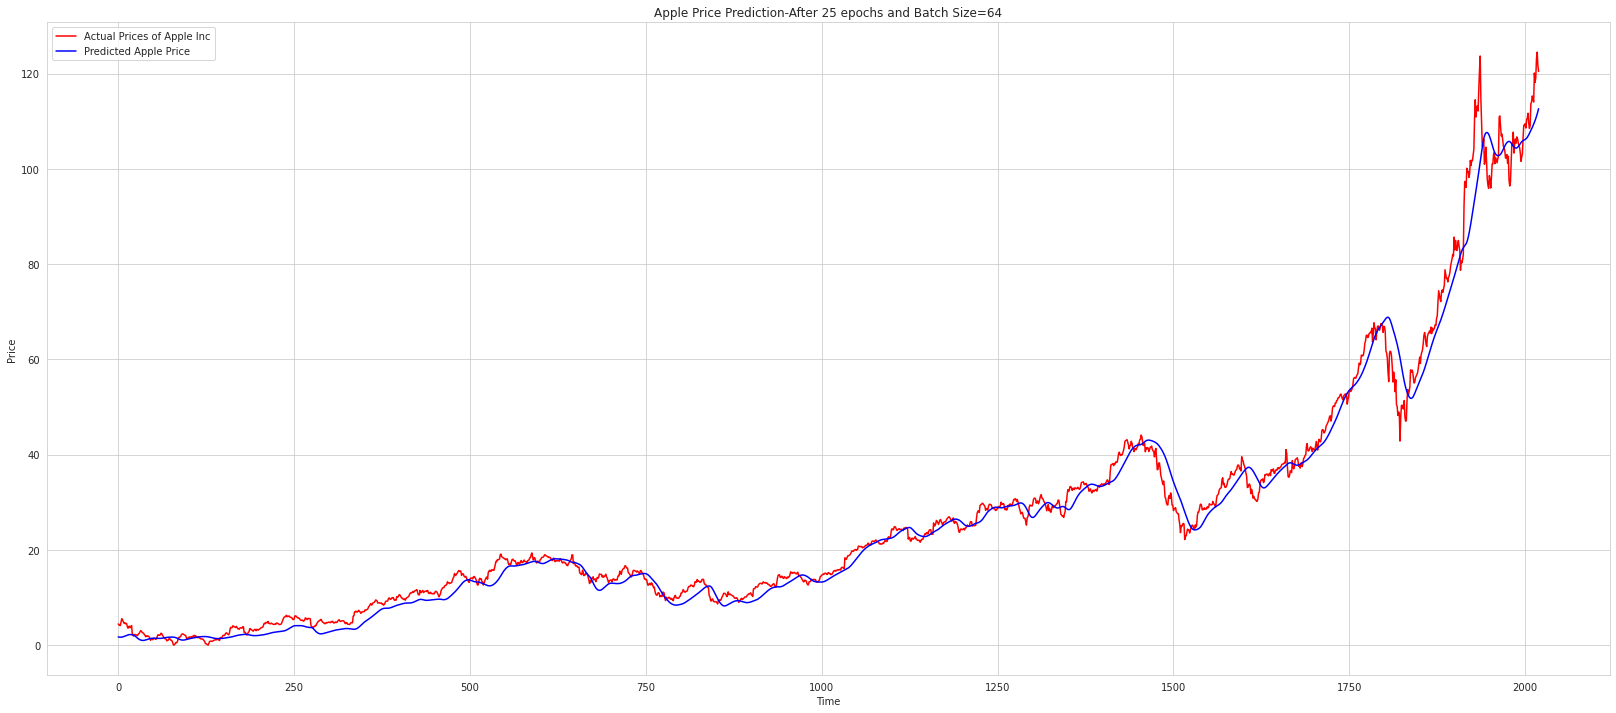

In [44]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Actual Prices of Apple Inc')
plt.plot(y_pred, color = 'blue', label = 'Predicted Apple Price')
plt.title('Apple Price Prediction-After 25 epochs and Batch Size=64')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

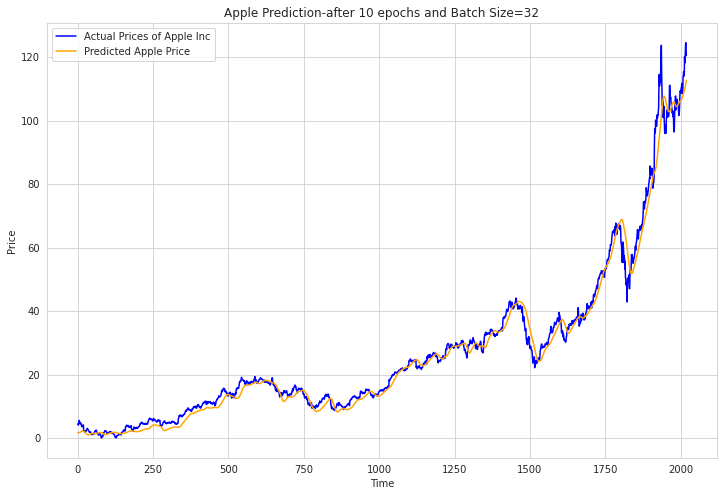

In [45]:
# Visualising time.........Visualizing various results at different epoch and batch size
plt.figure(figsize=(12,8))
plt.plot(y_test, color = 'blue', label = 'Actual Prices of Apple Inc')
plt.plot(y_pred, color = 'orange', label = 'Predicted Apple Price')
plt.title('Apple Prediction-after 10 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

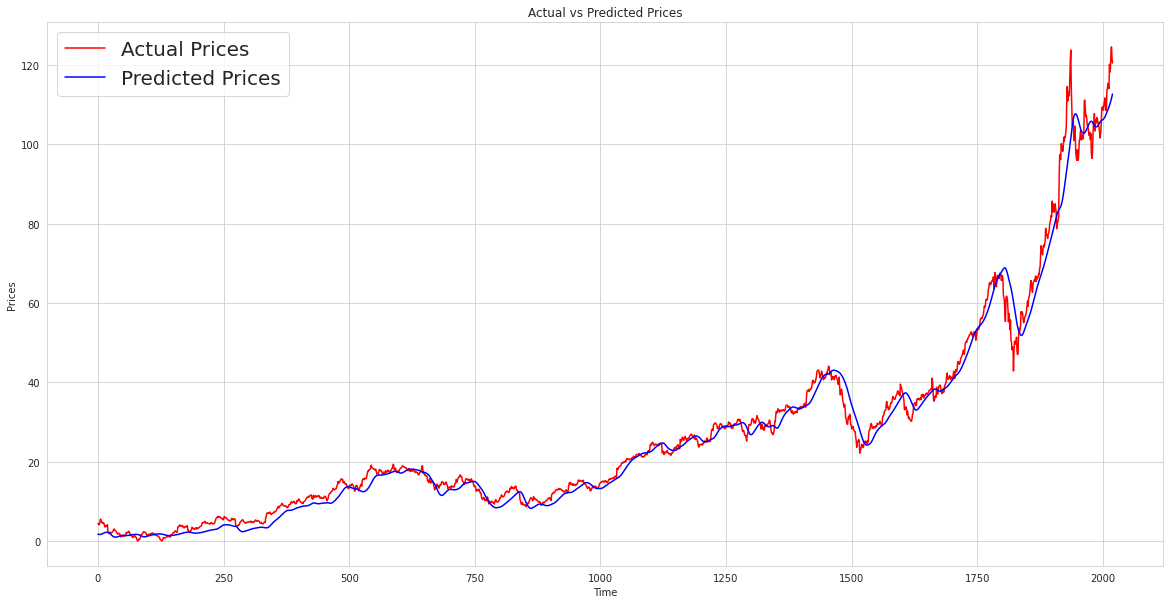

In [46]:
plt.figure(figsize=(20,10))
plt.plot(y_test,'red',label='Actual Prices')
plt.plot(y_pred,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Actual vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [49]:
 print(mean_squared_error(ans.y_test, ans.y_pred, squared = False))

0.024970246031989315


Calculating squared =true which is the RMSE value

In [48]:
 print(mean_squared_error(ans.y_test, ans.y_pred, squared = True))

0.0006235131868980782


In [50]:
apple

,High,Low,Open,Close,Volume,Adj Close,average,EMA20,EMA5,dist_EMA20,dist_EMA5
0,0.128906,0.128348,0.128348,0.128348,469033600,0.100039,0.128487,0.128487,0.128487,0.000000,0.000000
1,0.122210,0.121652,0.122210,0.121652,175884800,0.094820,0.121931,0.127863,0.126302,-4.639389,-3.460749
2,0.113281,0.112723,0.113281,0.112723,105728000,0.087861,0.113002,0.126448,0.121869,-10.633428,-7.275591
3,0.116071,0.115513,0.115513,0.115513,86441600,0.090035,0.115652,0.125420,0.119797,-7.787547,-3.459289
4,0.119420,0.118862,0.118862,0.118862,73449600,0.092646,0.119002,0.124808,0.119532,-4.652620,-0.443457
...,...,...,...,...,...,...,...,...,...,...,...
8075,18.571428,17.901072,18.176071,18.529642,757607200,15.961703,18.294553,19.638589,18.730060,-6.843849,-2.325174
8076,19.103571,18.580357,18.750000,19.067858,625685200,16.425322,18.875446,19.565908,18.778522,-3.528904,0.516145
8077,19.060715,18.767857,18.981071,18.796785,449369200,16.191816,18.901607,19.502642,18.819550,-3.081811,0.436018
8078,18.935715,18.531429,18.928572,18.633215,481689600,16.050920,18.757233,19.431650,18.798778,-3.470717,-0.220999


In [51]:
apple_Close= apple.iloc[:,3].values.reshape(-1,1)
apple_Close

array([[ 0.12834799],
       [ 0.121652  ],
       [ 0.112723  ],
       ...,
       [18.79678535],
       [18.63321495],
       [18.54750061]])

In [52]:
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
apple_Close_scaled= ss.fit_transform(apple_Close)

In [53]:
xtrain=[]
ytrain=[]
for i in range(30,len(apple_Close_scaled)):
    xtrain.append(apple_Close_scaled[i-30:i,0])
    ytrain.append(apple_Close_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
print(xtrain.shape)
print(ytrain.shape)

(8050, 30, 1)
(8050,)


In [54]:
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=50)

Epoch 1/50
269/269 [==============================] - 27s 66ms/step - loss: 0.0013
Epoch 2/50
269/269 [==============================] - 18s 65ms/step - loss: 8.3016e-04
Epoch 3/50
269/269 [==============================] - 18s 65ms/step - loss: 6.4861e-04
Epoch 4/50
269/269 [==============================] - 17s 65ms/step - loss: 5.9831e-04
Epoch 5/50
269/269 [==============================] - 17s 64ms/step - loss: 5.0216e-04
Epoch 6/50
269/269 [==============================] - 18s 65ms/step - loss: 4.7129e-04
Epoch 7/50
269/269 [==============================] - 17s 65ms/step - loss: 4.6784e-04
Epoch 8/50
269/269 [==============================] - 17s 64ms/step - loss: 4.7152e-04
Epoch 9/50
269/269 [==============================] - 18s 65ms/step - loss: 4.4139e-04
Epoch 10/50
269/269 [==============================] - 17s 65ms/step - loss: 4.3655e-04
Epoch 11/50
269/269 [==============================] - 17s 64ms/step - loss: 4.3382e-04
Epoch 12/50
269/269 [========================

In [55]:
testdata_Close= testdata.iloc[:,3].values.reshape(-1,1) #taking  Close price

In [57]:
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
testdata_Close= ss.fit_transform(testdata_Close)

In [58]:
testdata_Close.shape

(2020, 1)

In [59]:
xtest=[]
ytest=[]
for i in range(30,len(testdata_Close)):
    xtest.append(testdata_Close[i-30:i,0])
    ytest.append(testdata_Close[i,0])

xtest, ytest = np.array(xtest), np.array(ytest)

xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
print(xtest.shape)
print(ytest.shape)

(1990, 30, 1)
(1990,)


In [61]:
predicted_value= regression.predict(xtest)

63/63 [==============================] - 3s 19ms/step


In [62]:
predicted_value.shape

(1990, 1)

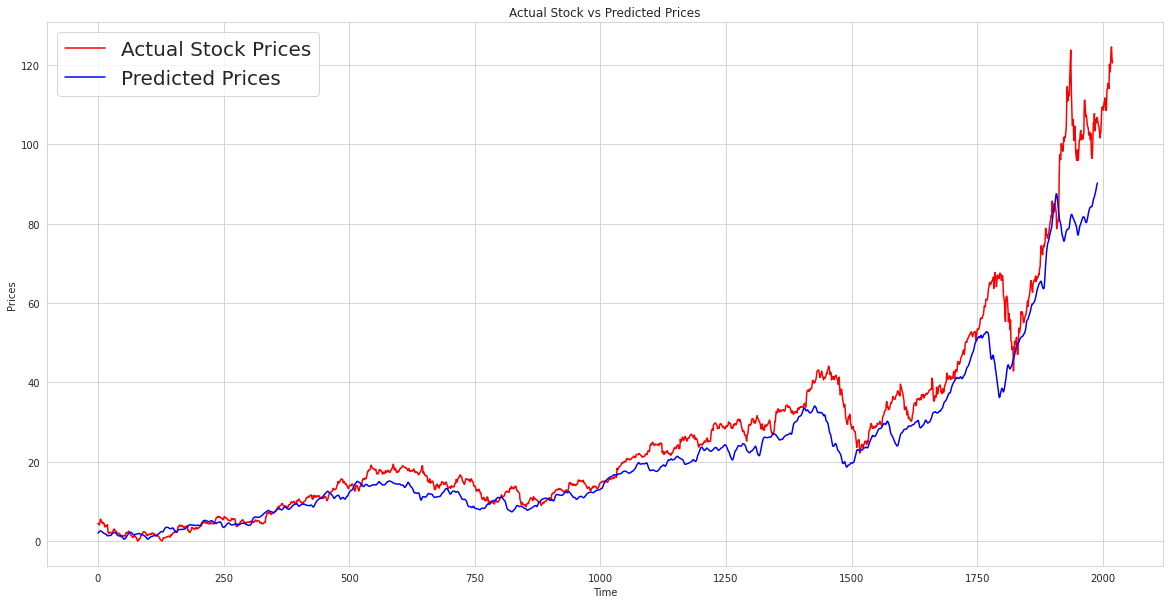

In [63]:
plt.figure(figsize=(20,10))
plt.plot(y_test,'red',label='Actual Stock Prices')
plt.plot(predicted_value*100,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Actual Stock vs Predicted Prices')
plt.legend(loc='best', fontsize=20)